# **Importing libraries and data file**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv',index_col='CustomerID')

In [4]:
data.rename(columns={'Genre':'Gender'},inplace=True)

In [5]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


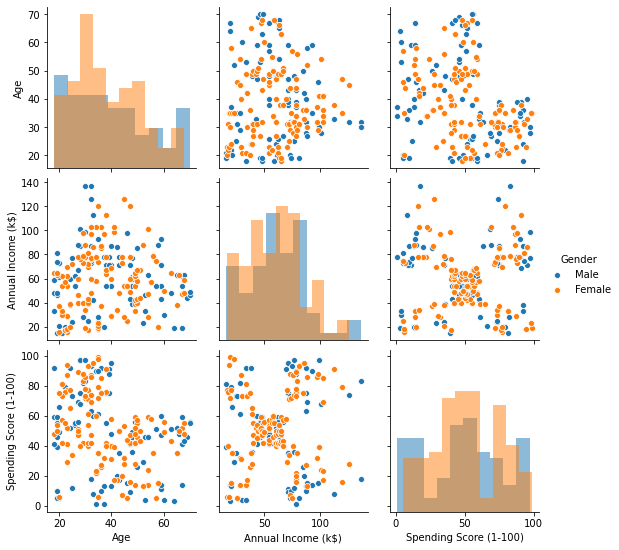

In [6]:
sns.pairplot(data,hue='Gender',diag_kind='hist',diag_kws={'alpha':0.5})

# **Data Pre-Processing**

**Selecting only 2 variables for Hierarchial Clustering** (for ease of representation in 2D plots)

In [7]:
data.drop(['Gender','Age'],axis=1,inplace=True)

In [8]:
data.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


# **Using the dendrogram to find optimal number of clusters**

In [11]:
from scipy.cluster import hierarchy as sch

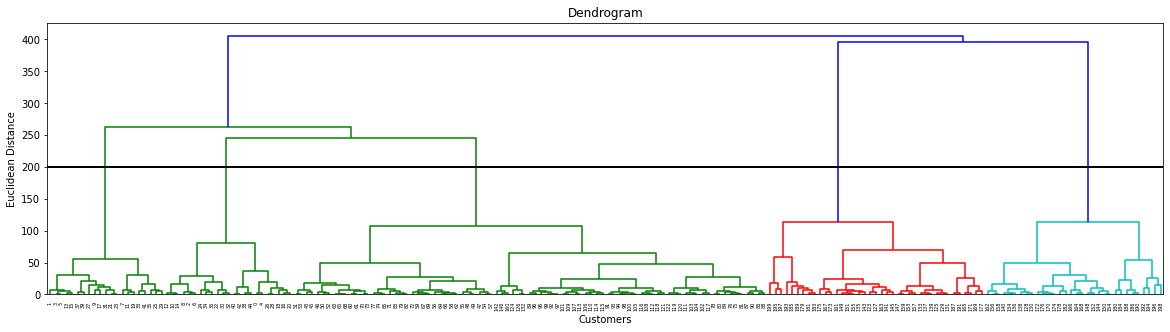

In [30]:
plt.figure(figsize=(20,5))
dendrogram = sch.dendrogram(Z=sch.linkage(data,method='ward')) #ward method corresponds to minimization of variance
plt.plot([1,2000], [200, 200], lw=2,color='black') #plotting the reference line used in visualising the cluster cutoff 
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

**Takeaways from Dendrogram** 

- Visually we try to analyze the dendrogram to find the longest distance that we can get from the highest hierarchial node while moving downwards  
- The highest such distance is observed in the third vertical green line (from the left). Hence, we drew a horizontal cutoff line to find the optimal number of clusters
- This horizontal line cuts 5 such vertical lines and thus the **optimal number of clusters is five**

# **Training the Hierarchial Clustering model**

In [32]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [33]:
hc.fit(data)

AgglomerativeClustering(n_clusters=5)

In [34]:
data['cluster_labels'] = hc.labels_

In [35]:
data['cluster_labels'].replace([0,1,2,3,4],[1,2,3,4,5],inplace=True)

In [36]:
data.head()

,Annual Income (k$),Spending Score (1-100),cluster_labels
CustomerID,,,
1,15,39,5
2,15,81,4
3,16,6,5
4,16,77,4
5,17,40,5


# **Visualising the Clusters**

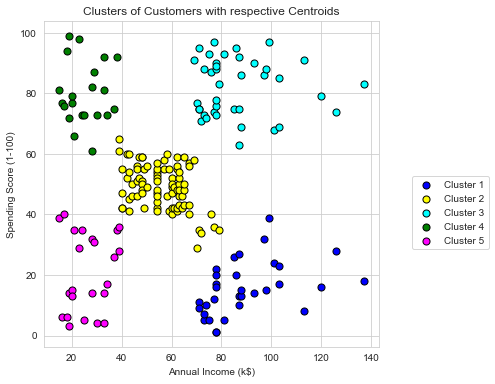

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,6))
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==1],c='blue',
            edgecolors='black',s=50,label='Cluster 1')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==2],c='yellow',
            edgecolors='black',s=50,label='Cluster 2')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==3],c='cyan',
            edgecolors='black',s=50,label='Cluster 3')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==4],c='green',
            edgecolors='black',s=50,label='Cluster 4')
plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=data[data['cluster_labels']==5],c='magenta',
            edgecolors='black',s=50,label='Cluster 5')
# plt.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], s = 200, 
#             c='red', label = 'Centroids',edgecolors='black')
plt.legend(loc=(1.1,0.3))
plt.title('Clusters of Customers with respective Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [39]:
data['cluster_labels'].value_counts(normalize=True)*100

2    42.5
3    19.5
1    16.0
5    11.5
4    10.5
Name: cluster_labels, dtype: float64

**Thus, in the above final output we can easily identify 5 distinct clusters of customers**

- Majority of the customers lie in cluster 2 which represents annual income in the range of 40k to 70k USD and spending score between 40 to 60
- However, we can also see that the highest potential customers lie in cluster 3 which has 19.5% of the current observations. This group has high annual income as well as high spending score
- A small proportion of individuals (10.5%) present in cluster 4 also have a high spending score in spite of low annual income
- Hence, in terms of marketing efforts we should focus on customers who fall in cluster 3 and 4 followed by cluster 2